## 自己撰寫自己的loss function
簡介
- loss function 在機器學習占據重要的位置，是以判斷模型學習的基礎，高度影響模型學習的方向，在其他領域也常常用到，在可以將問題轉化成最佳化問題的情況下，通常都是極小化損失函數。
- 在最佳化損失函數的途中，會不斷改變模型參數，使得模型可以預測得更好(損失更小)。
分類
- 回歸問題一般使用MSE、MAE當作損失函數，但可以從SBERT(Triplet Objective Function)知道，透過損失函數的改變，可以學習到目的截然不同的模型，即便模型結構相同，因此，損失函數的理解必不可少。
- 分類問題一般使用crossentropy。

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

在[keras](https://keras.io/api/losses/)中，只要寫一個function，可以接受y_true, y_pred，並且return 陣列的 losses(一個batch裡面就有一個loss value) 就可以傳遞進 compile 函數中進行計算。 而 sample_weight函數會自動被支持。

In [35]:
# 簡單建造一個回歸模型，並且自己寫一個MSE與官方版本比較。
# 簡化就不正規化了。

# 資料
X = np.array(range(-5000, 5000), dtype='float').reshape(-1, 1)
y = X**2 + X + 3

# np.random.shuffle(X)
print(X.shape, y.shape)

(10000, 1) (10000, 1)


In [36]:
for x1, y1 in zip(X, y):
    print(x1, y1)
    break

[-5000.] [24995003.]


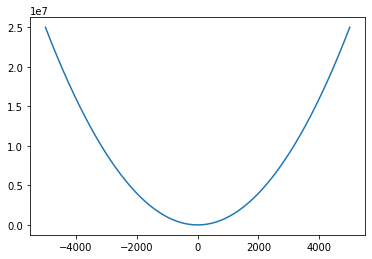

In [37]:
plt.plot(X, y)

In [38]:
def get_model(X):
    """
        簡單建造一個MLP模型
    """
    inputs = keras.Input(shape=X.shape[1], dtype='float32')
    hidden = keras.layers.Dense(units=32, activation='relu')(inputs)
    hidden = keras.layers.Dense(units=16, activation='relu')(hidden)
    outputs = keras.layers.Dense(units=1)(hidden)
    
    return keras.Model(inputs, outputs)


model_own = get_model(X)
model_own.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 自己撰寫MSE functino

def loss_fn(y_true, y_pred):
    """MSE"""
    square_diff = tf.square(y_true-y_pred)      # list of (y-y-hat)**2
    return tf.reduce_mean(square_diff, axis=-1) # sum

In [40]:
model_own.compile(optimizer='adam', loss=loss_fn)
model_own.fit(X, y, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 939us/step - loss: 124724944306176.0000
Epoch 2/5
313/313 [==============================] - 0s 955us/step - loss: 121492889141248.0000
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 110665318531072.0000A: 0s - loss: 11451230060544
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 91053541556224.0000
Epoch 5/5
313/313 [==============================] - 0s 942us/step - loss: 65640060682240.0000


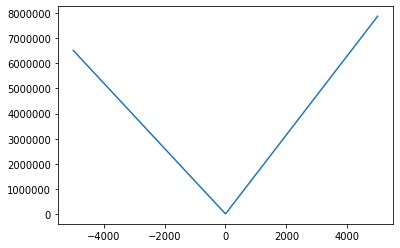

In [41]:
plt.plot(X, model_own.predict(X))

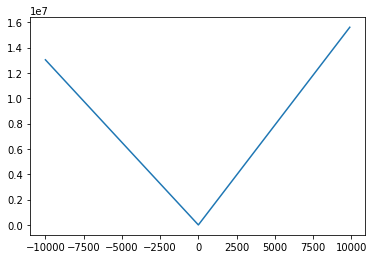

In [42]:
# 隨機產生新的樣本去產生預測

x_test = np.array(range(-10000, 10000, 100))
y_test = x_test ** 2 + x_test + 3


y_pred_own = model_own.predict(x_test)
plt.plot(x_test, y_pred_own)

In [43]:
model_keras = get_model(X)
model_keras.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_keras.compile(optimizer='adam', loss='mse')
model_keras.fit(X, y, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 907us/step - loss: 124626025840640.0000
Epoch 2/5
313/313 [==============================] - 0s 965us/step - loss: 120121662111744.0000
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 105880498470912.0000
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 81384362213376.0000
Epoch 5/5
313/313 [==============================] - 0s 920us/step - loss: 52375024828416.0000


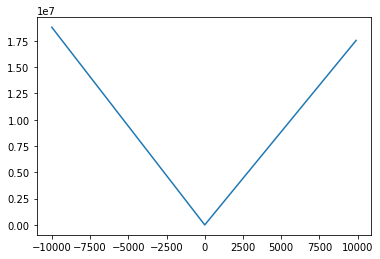

In [45]:
y_pred_keras = model_keras.predict(x_test)
plt.plot(x_test, y_pred_keras)

> 學習的效果一致，自己寫出的可用。

參考了一篇[ebay 推薦系統文章](https://medium.com/ebaytech/improving-shopping-recommendations-for-customers-through-ebays-relevance-cascade-model-1d52ad4f0ef4)，找出相似物品推薦，是一個filter model，其透過改變lose function 來幫助達到真實問題解決。

In [64]:
# 自己撰寫 loss function
# 寫成一個複合型的l1搭配l2 loss function

def loss_fn_mix(y_true, y_pred, alpha=0.3):
    """ custom loss"""
    square_diff = tf.square(y_true-y_pred)      
    abs_diff = tf.abs(y_true-y_pred)
    loss_total = alpha * square_diff + (1-alpha) * square_diff
    return tf.reduce_mean(loss_total, axis=-1)

In [65]:
new_model = get_model(X)
new_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [66]:
new_model.compile(optimizer='adam', loss=loss_fn_mix)
new_model.fit(
    x=X,
    y=y,
    batch_size=32,
    epochs=5
)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 124658254872576.0000
Epoch 2/5
313/313 [==============================] - 0s 987us/step - loss: 120620339691520.0000
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 107432164458496.0000
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 84020801044480.0000
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 55570597937152.0000


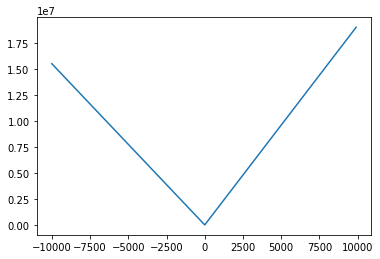

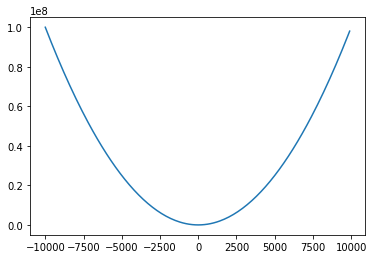

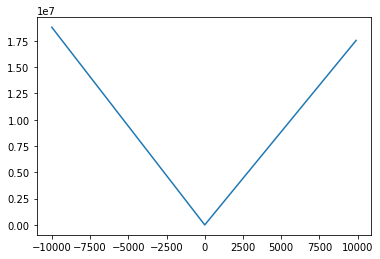

In [67]:
y_pred = new_model.predict(x_test)
plt.plot(x_test, y_pred)
plt.figure()
plt.plot(x_test, y_test)
plt.figure()
plt.plot(x_test, model_keras.predict(x_test))